In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score



from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [68]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [69]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [70]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

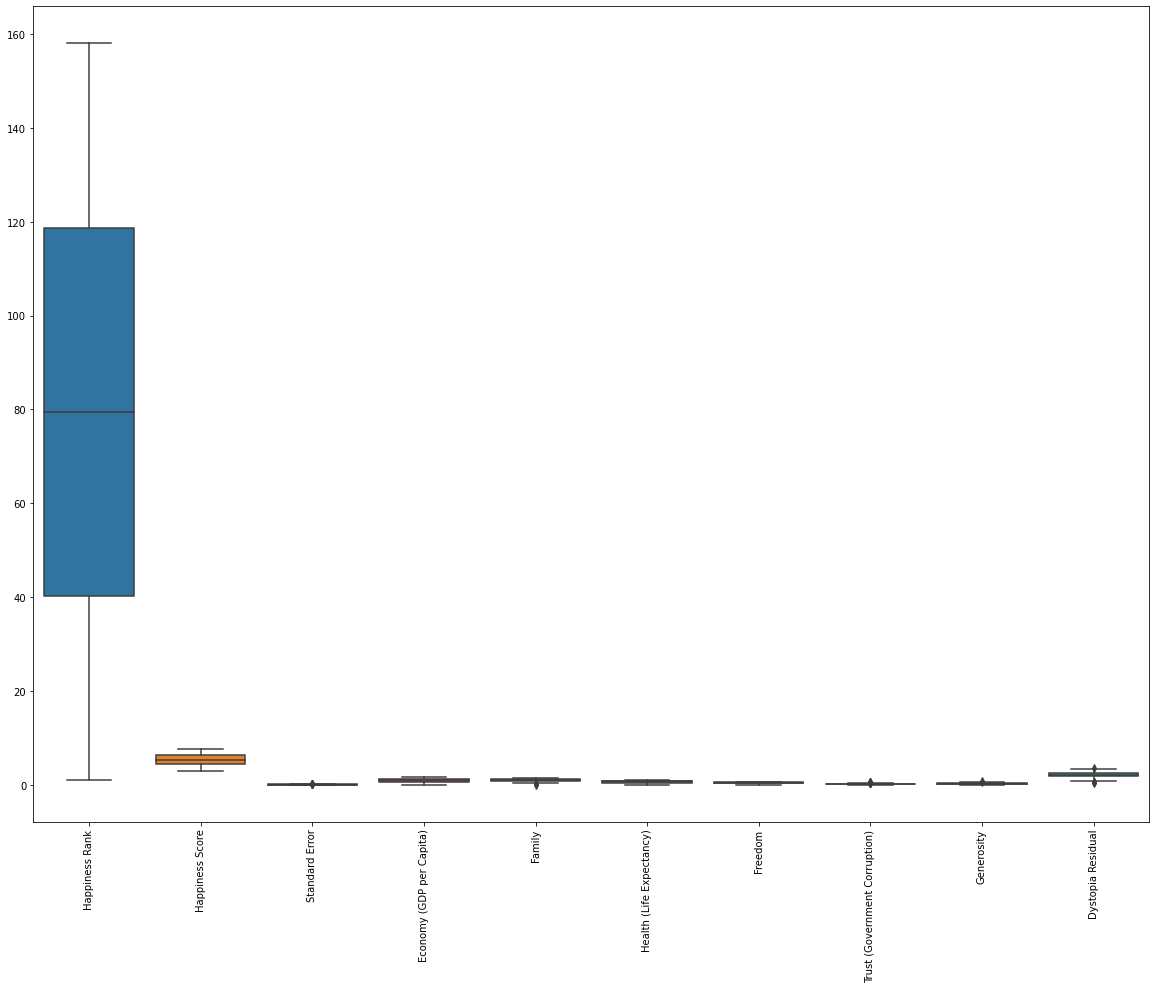

In [71]:
# show all numeric columns as boxplots except for RANK
plt.figure(figsize=(20,15))
sns.boxplot(data=df.iloc[:,1:])
plt.xticks(rotation=90);

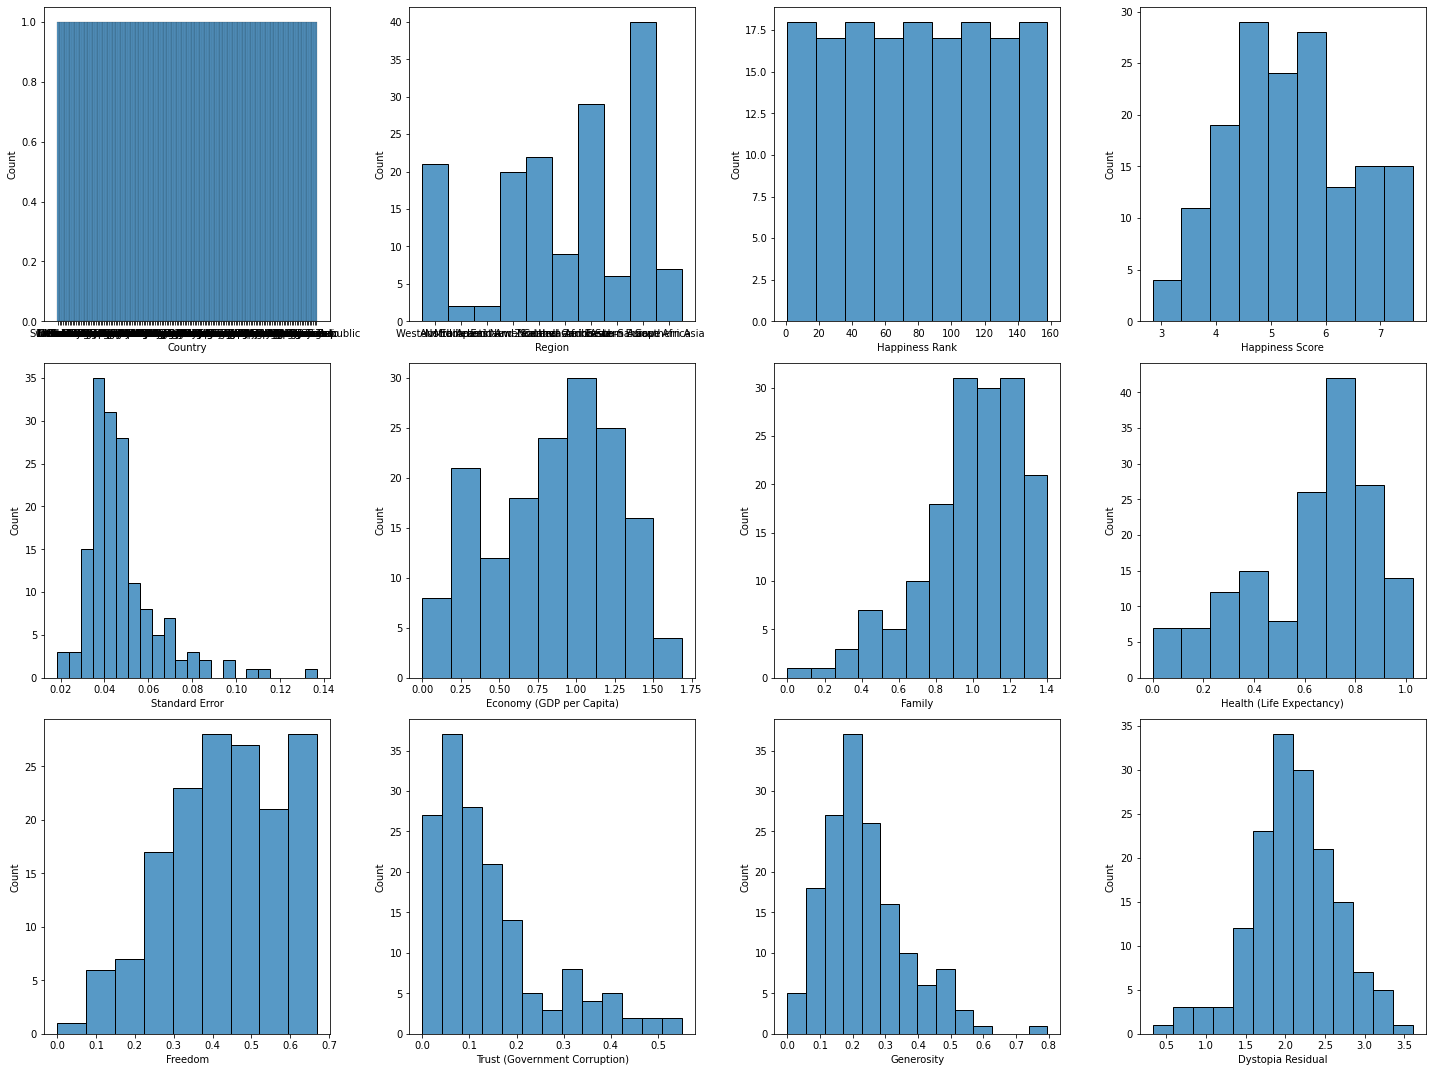

In [72]:
# Create a figure and a set of subplots with as many rows as needed and 4 columns
num_rows = (len(df.columns) + 2) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

In [73]:
df.drop(['Country','Region'],axis=1,inplace=True)

In [74]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [75]:
# Cast data as proper types
dfn = {
    'Rank': df['Happiness Rank'].astype(int),
    'Score': df['Happiness Score'].astype(float),
    'Error': df['Standard Error'].astype(float),
    'GDP': df['Economy (GDP per Capita)'].astype(float),
    'Family': df['Family'].astype(float),
    'Health': df['Health (Life Expectancy)'].astype(float),
    'Freedom': df['Freedom'].astype(float),
    'Trust': df['Trust (Government Corruption)'].astype(float),
    'Generosity': df['Generosity'].astype(float),
    'Dystopia': df['Dystopia Residual'].astype(float)
}

In [76]:
# Reassign dataframe with proper types
df = pd.DataFrame(dfn)
df

,Rank,Score,Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Data Analysis

In [77]:
# Describe happiness data with various statistical metrics
df.describe()
     

,Rank,Score,Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:xlabel='Score', ylabel='Health'>

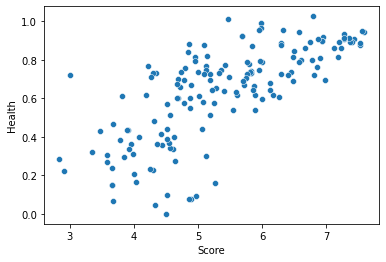

In [78]:
sns.scatterplot(data=df,x='Score',y='Health')

<AxesSubplot:xlabel='Score', ylabel='GDP'>

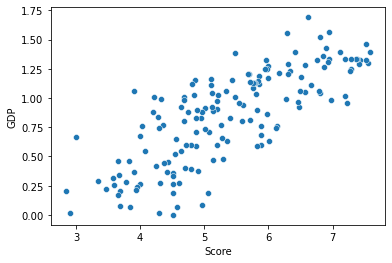

In [79]:
sns.scatterplot(data=df,x='Score',y='GDP')

<AxesSubplot:xlabel='Score', ylabel='Freedom'>

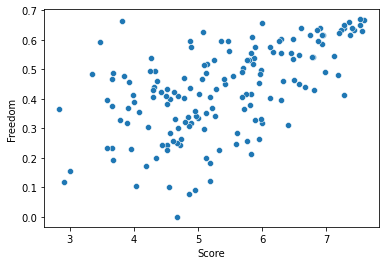

In [80]:
sns.scatterplot(data=df,x='Score',y='Freedom')

<AxesSubplot:xlabel='Score', ylabel='Generosity'>

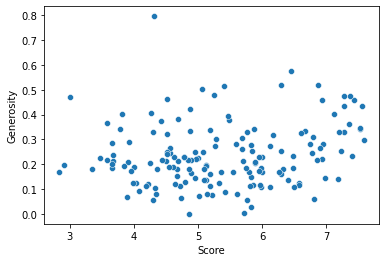

In [81]:
sns.scatterplot(data=df,x='Score',y='Generosity')

<AxesSubplot:xlabel='Score', ylabel='Trust'>

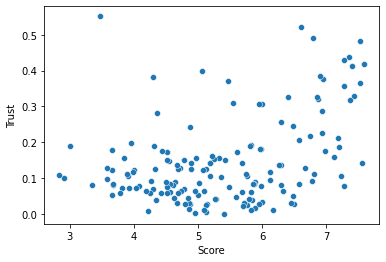

In [82]:
sns.scatterplot(data=df,x='Score',y='Trust')

<AxesSubplot:xlabel='Family', ylabel='Health'>

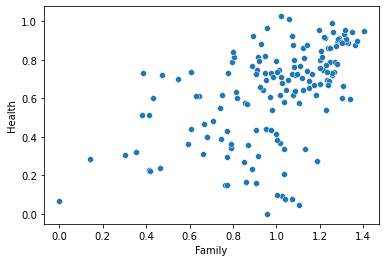

In [117]:
sns.scatterplot(data=df,x='Family',y='Health')

In [83]:
df.skew()

Rank          0.000418
Score         0.097769
Error         1.983439
GDP          -0.317575
Family       -1.006893
Health       -0.705328
Freedom      -0.413462
Trust         1.385463
Generosity    1.001961
Dystopia     -0.238911
dtype: float64

In [84]:
df["Trust"]=np.cbrt(df["Trust"])

In [85]:
df.skew()

Rank          0.000418
Score         0.097769
Error         1.983439
GDP          -0.317575
Family       -1.006893
Health       -0.705328
Freedom      -0.413462
Trust         0.011932
Generosity    1.001961
Dystopia     -0.238911
dtype: float64

<AxesSubplot:>

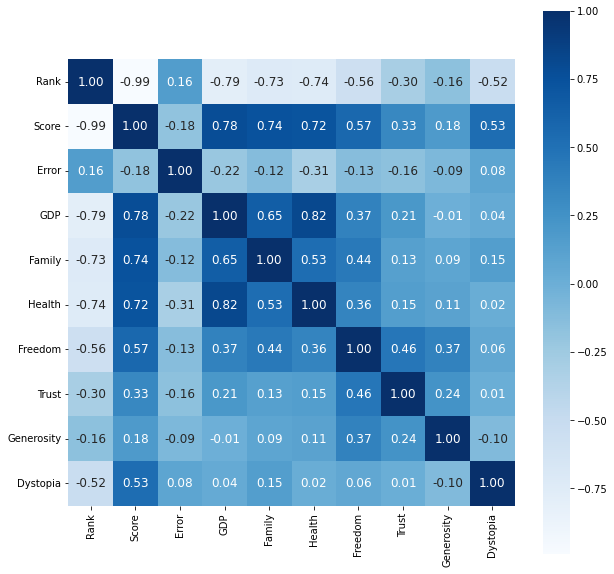

In [86]:
# To find multicolinearity

correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':12},cmap="Blues")

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df.iloc[:,:-1].values,i) for i in range(df.iloc[:,:-1].shape[1])]
vif["features"]=df.iloc[:,:-1].columns
print(vif)

   VIF Factor    features
0    4.804622        Rank
1   93.591024       Score
2    9.800302       Error
3   23.975110         GDP
4   34.894286      Family
5   26.909584      Health
6   17.252605     Freedom
7   16.957514       Trust
8    5.728660  Generosity


In [97]:
X = df[['GDP','Health','Freedom','Trust','Generosity']].values
Y= df[['Score']].values

In [98]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [99]:
print(X.shape,X_train.shape,X_test.shape)

(158, 5) (126, 5) (32, 5)


In [105]:
lr=LinearRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

Linerar Regression

In [107]:
lr.fit(X_train, Y_train)

LinearRegression()

In [119]:
training_data_pred = lr.predict(X_train)

In [123]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_pred)
print("R squared value:", r2_train)

R squared value: 0.7197047888694514


In [125]:
test_data_pred = lr.predict(X_test)

In [126]:
r2_test = metrics.r2_score(Y_test, test_data_pred)
print("R squared value:", r2_test)

R squared value: 0.7047383951160271


In [137]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R squared score: ', r2_score(Y_test, y_pred))
     

Mean Absolute Error: 0.5807152527149153
Mean Squared Error: 0.48020201922780464
Root Mean Squared Error: 0.6929661025099313
R squared score:  0.6771203185429294


In [144]:
pred=pd.DataFrame(training_data_pred)
pred=pred.rename(columns={0:'Predicted_Happiness Score'})

In [145]:
pred.head()

,Predicted_Happiness Score
0,4.090988
1,4.815212
2,5.089709
3,5.140717
4,4.142521


Random Forrest Regressor

In [129]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [130]:
# Predict on test data
y_pred = regr.predict(X_test)


In [136]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R squared score: ', r2_score(Y_test, y_pred))
     

Mean Absolute Error: 0.5807152527149153
Mean Squared Error: 0.48020201922780464
Root Mean Squared Error: 0.6929661025099313
R squared score:  0.6771203185429294


Descision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
regress = DecisionTreeRegressor(max_depth=7, random_state=0)
regress.fit(X_train, Y_train)
     

DecisionTreeRegressor(max_depth=7, random_state=0)

In [141]:
# Predict on test data
y_pred = regress.predict(X_test)

In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R squared score: ', r2_score(Y_test, y_pred))

Mean Absolute Error: 0.5265572916666668
Mean Squared Error: 0.4636145463886835
Root Mean Squared Error: 0.6808924631604344
R squared score:  0.6882734535403325


In [146]:
import joblib
joblib.dump(lr,"WHR.obj")

['WHR.obj']